# Praktikum Class Imbalance

Nama : Alif As'ad Ramadhan

NRP  : 5054231007

## Dataset yang digunakan adalah `Cerebral Stroke Prediction-Imbalanced Dataset`

Berikut link kaggle nya : https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset

## 1. Prepare Tools

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

%matplotlib inline

## 2. Analisis Dataset

In [366]:
df = pd.read_csv("dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [367]:
len(df)

43400

In [368]:
# cek apakah ada missing value
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [369]:
# isi data yang hilang pada kolom numerik menggunakan median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [370]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [371]:
# isi data yang hilang pada kolom kategorikal menggunakan modus
df.fillna(df.mode().iloc[0], inplace=True)

In [372]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [373]:
# Convert kolom kategorikal menjadi numerik
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  int8   
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  int8   
 6   work_type          43400 non-null  int8   
 7   Residence_type     43400 non-null  int8   
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  int8   
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 2.5 MB


In [375]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [376]:
df.nunique()

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

## 3. EDA

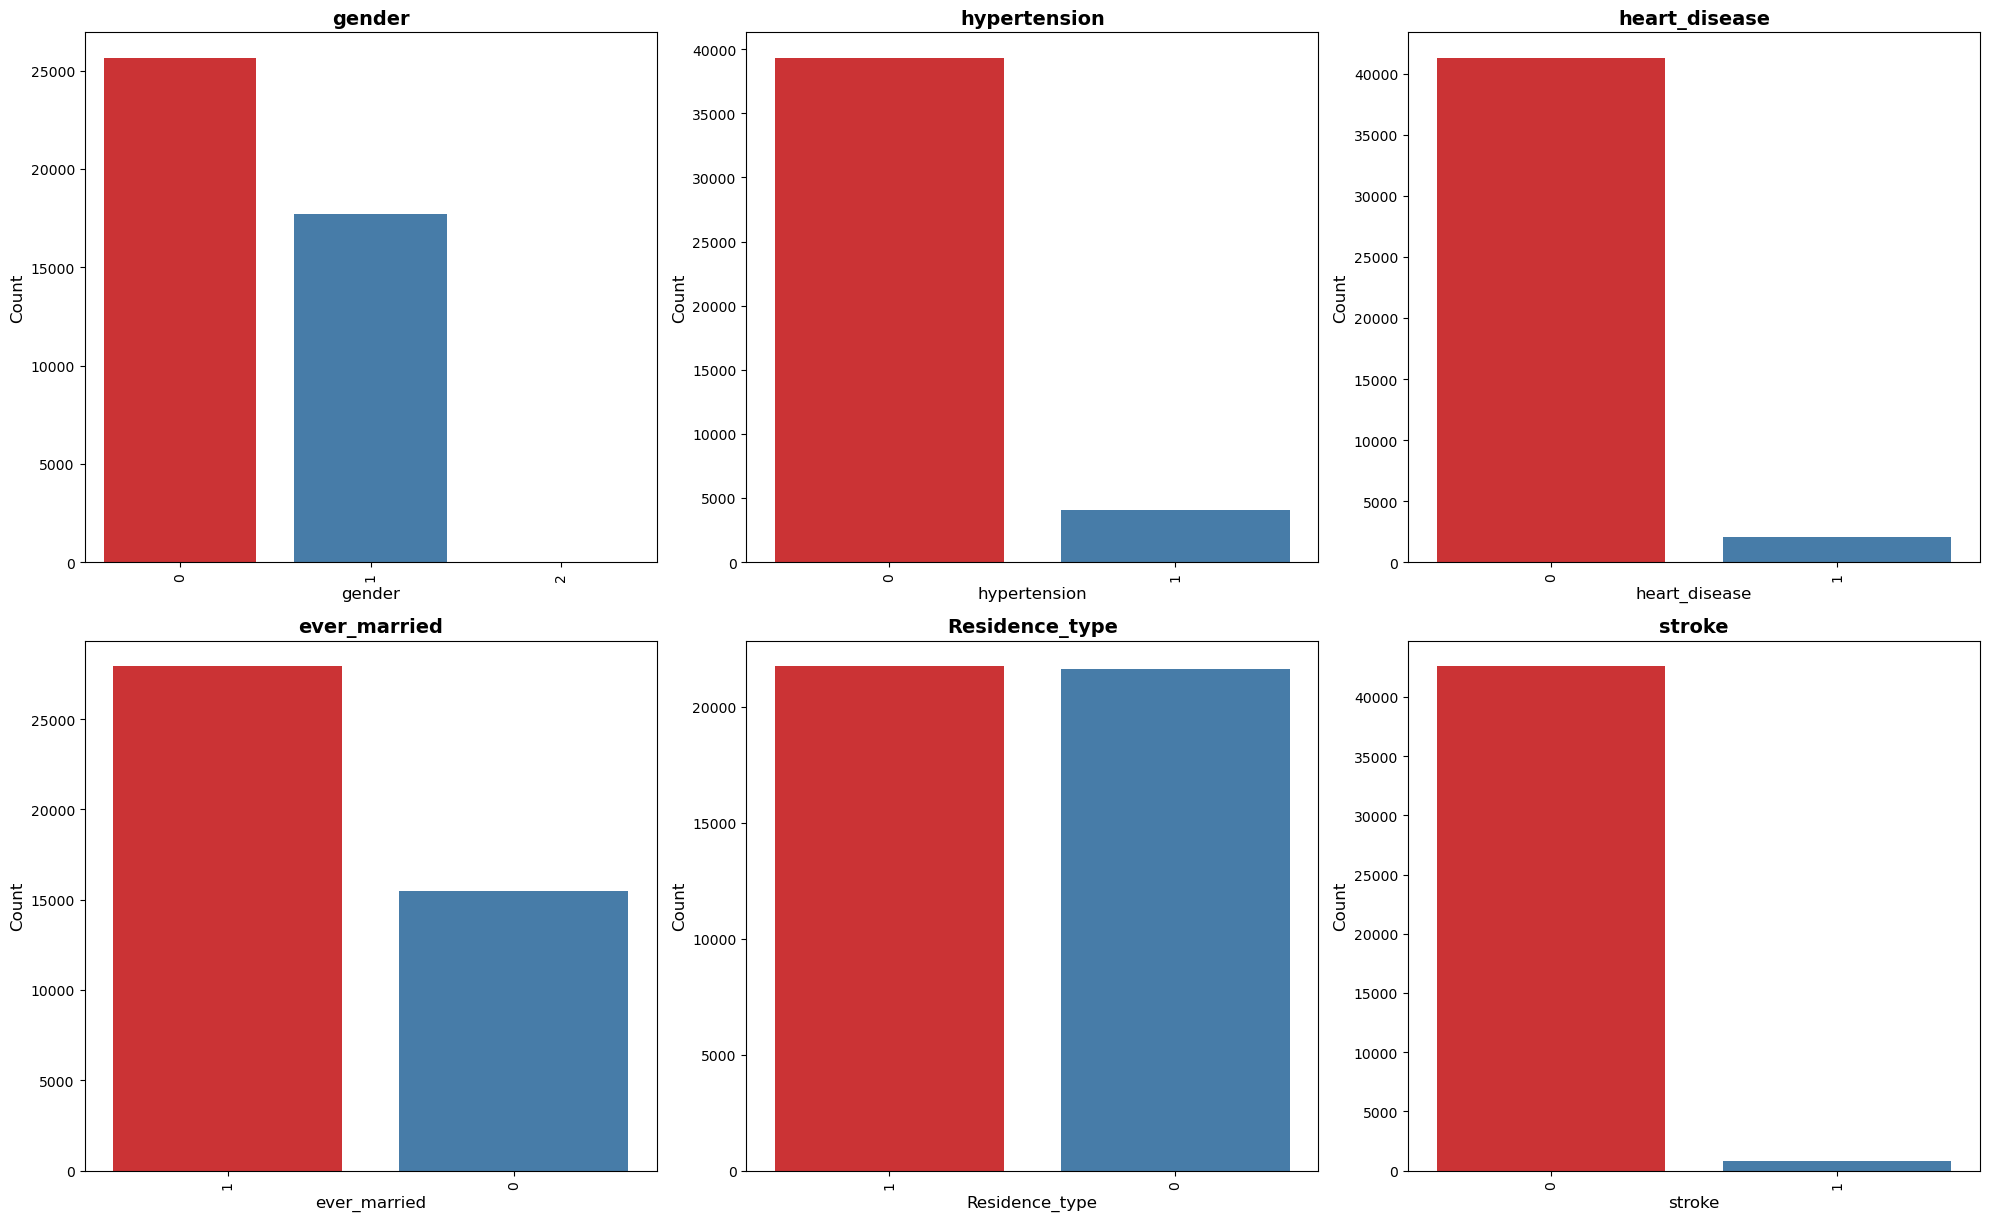

In [378]:
import warnings
import seaborn as sns

# Menonaktifkan warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Daftar kolom kategorikal yang ingin dibuat plot
columns_to_plot = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']

# Definisi jumlah kolom dan baris
n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(20, n_rows * 6))

# Membuat countplot untuk setiap kolom kategorikal dalam df
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Mengambil 10 nilai teratas dari kolom
    top_10_items = df[column].value_counts().nlargest(10).index
    
    # Memfilter data hanya dengan nilai-nilai yang ada dalam top 10
    filtered_df = df[df[column].isin(top_10_items)]
    
    # Membuat countplot
    sns.countplot(data=filtered_df, x=column, palette='Set1', order=top_10_items)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Mengatur rotasi label x jika jumlah kategori terlalu banyak
    plt.xticks(rotation=90)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

(12.5, -0.5)

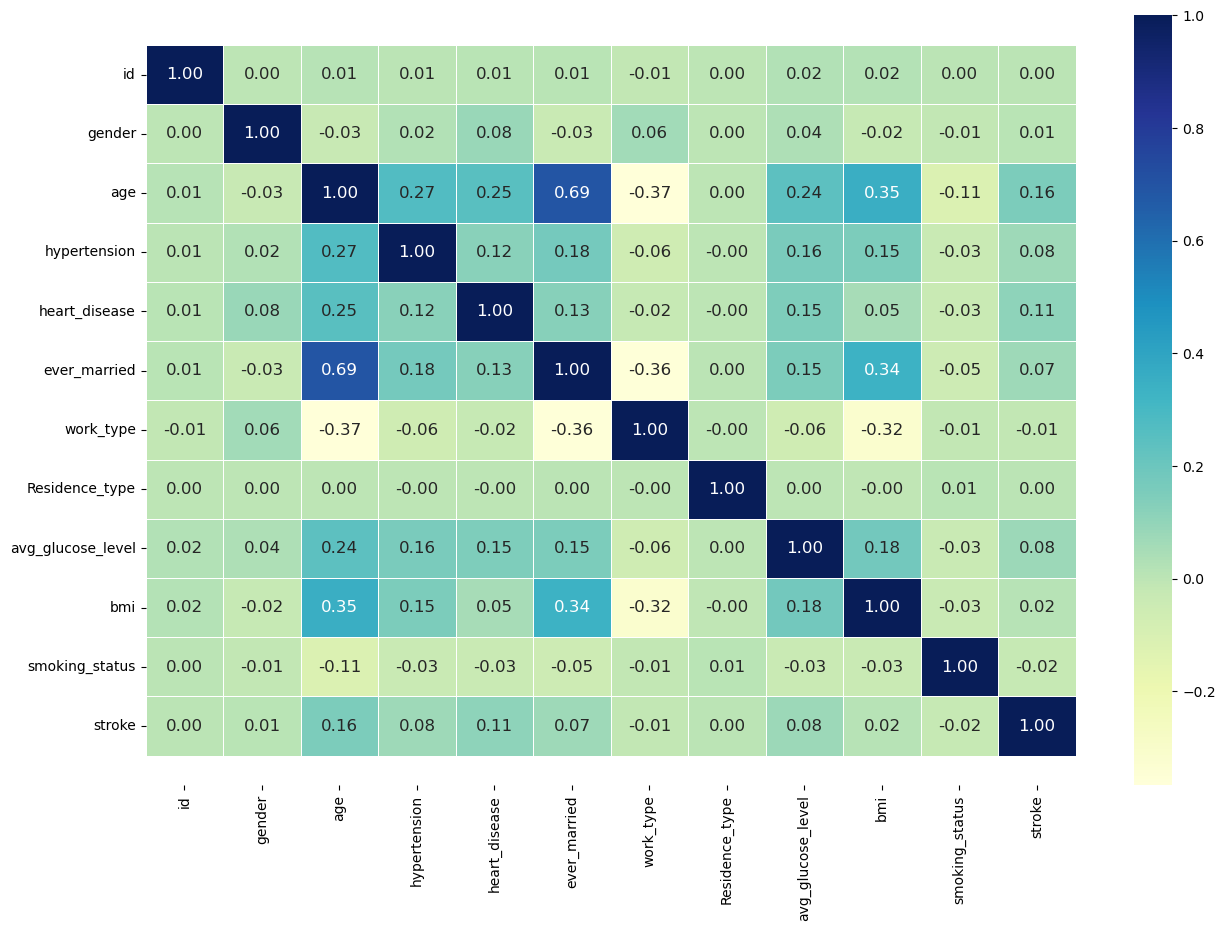

In [472]:
# Membuat corelation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 4. Modeliing

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

## SMOTE

**`SMOTE`** atau **`Synthetic Minority Over-sampling Technique`** adalah teknik pemrosesan data yang digunakan untuk menyeimbangkan dataset yang mengalami ketidakseimbangan kelas (class imbalance). Ketika model dilatih pada dataset yang tidak seimbang, ia cenderung mengabaikan kelas minoritas karena lebih banyak sampel dari kelas mayoritas. SMOTE mengatasi masalah ini dengan menciptakan sampel sintetik dari kelas minoritas sehingga jumlahnya seimbang dengan kelas mayoritas.

In [384]:
from sklearn.model_selection import train_test_split

X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

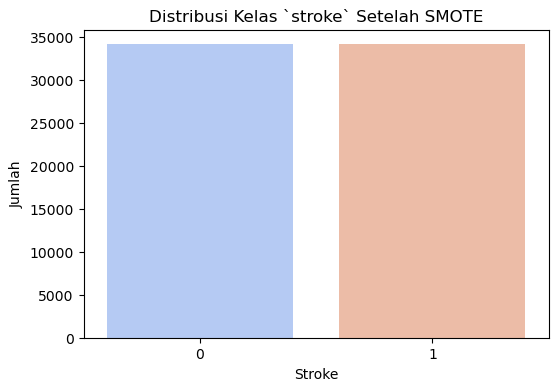

In [385]:
# Metode SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualisasi Setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='coolwarm')
plt.title('Distribusi Kelas `stroke` Setelah SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.show()

In [386]:
# cek panjang data sebelum dan sesudah di smote
len(X_train), len(X_train_smote)

(34720, 68196)

Bisa dilihat bahwa data sebelum dan sesudah di smote bertambah jumlahnya

## Langkah-langkah Algoritma SMOTE

1. Menetapkan set kelas minoritas A. Untuk setiap 
x∈A, tetangga terdekat 
k dari 
x diperoleh dengan menghitung jarak Euclidean antara 
x dan setiap sampel lainnya dalam set A.

2. Mengatur laju pengambilan sampel N sesuai dengan proporsi ketidakseimbangan. Untuk setiap  x∈A, N contoh (yaitu 
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
 ) dipilih secara acak dari tetangga terdekat 
𝑘,dan mereka membentuk set 𝐴1

3. Untuk setiap contoh 
𝑥
𝑘
∈
𝐴
1​ (dengan 
k=1,2,3,…,N), rumus berikut digunakan untuk menghasilkan contoh baru:

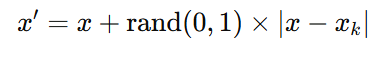

di mana 
rand (0,1) mewakili angka acak antara 0 dan 1.

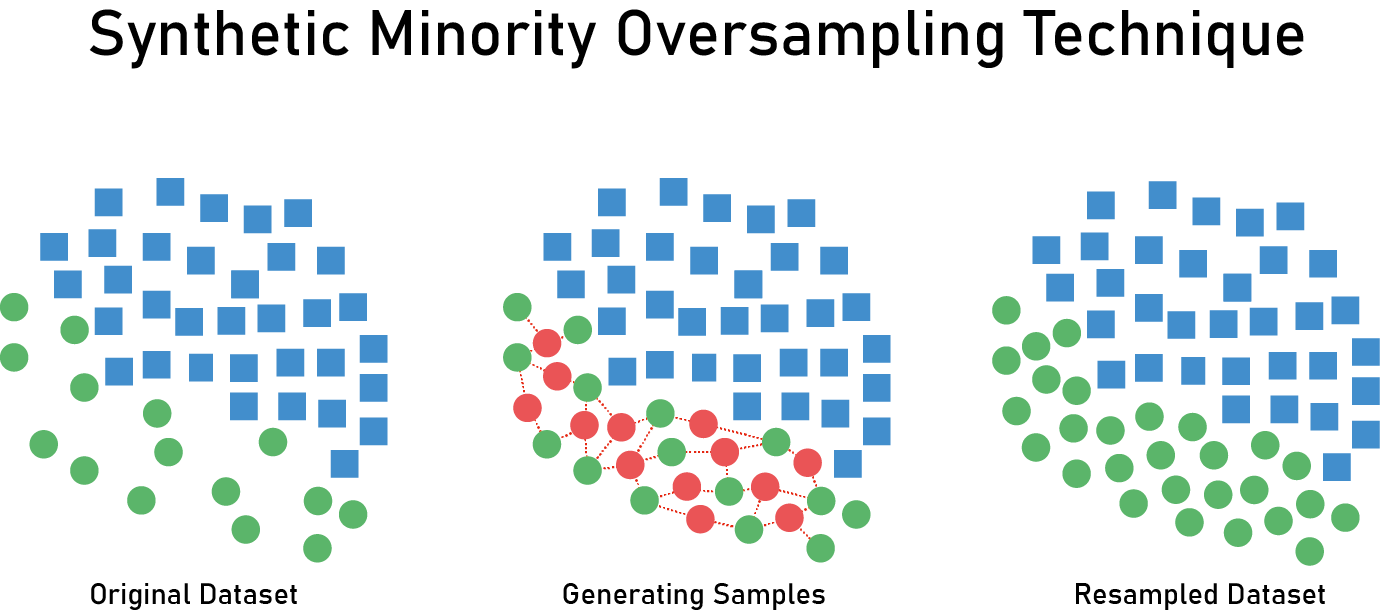

di mana 
rand(0,1) mewakili angka acak antara 0 dan 1.

### Kelebihan SMOTE

- **Efektif pada Dataset dengan Ketidakseimbangan yang Tinggi:** SMOTE menghasilkan sampel baru berdasarkan informasi dari tetangga terdekat, sehingga
lebih efektif daripada metode penyeimbangan lain, seperti undersampling, yang dapat kehilangan data mayoritas.

- **Mengurangi Overfitting dari Duplikasi Data:** SMOTE mengurangi kemungkinan overfitting yang terjadi karena penyalinan data kelas minoritas berulang kali.

- **Kesesuaian untuk Algoritma Berbasis Pembelajaran Statistik:** Algoritma seperti Random Forest dan Gradient Boosting cenderung lebih cocok bekerja dengan dataset yang seimbang, dan SMOTE dapat memberikan dataset yang lebih bervariasi dibanding metode lain seperti random oversampling.

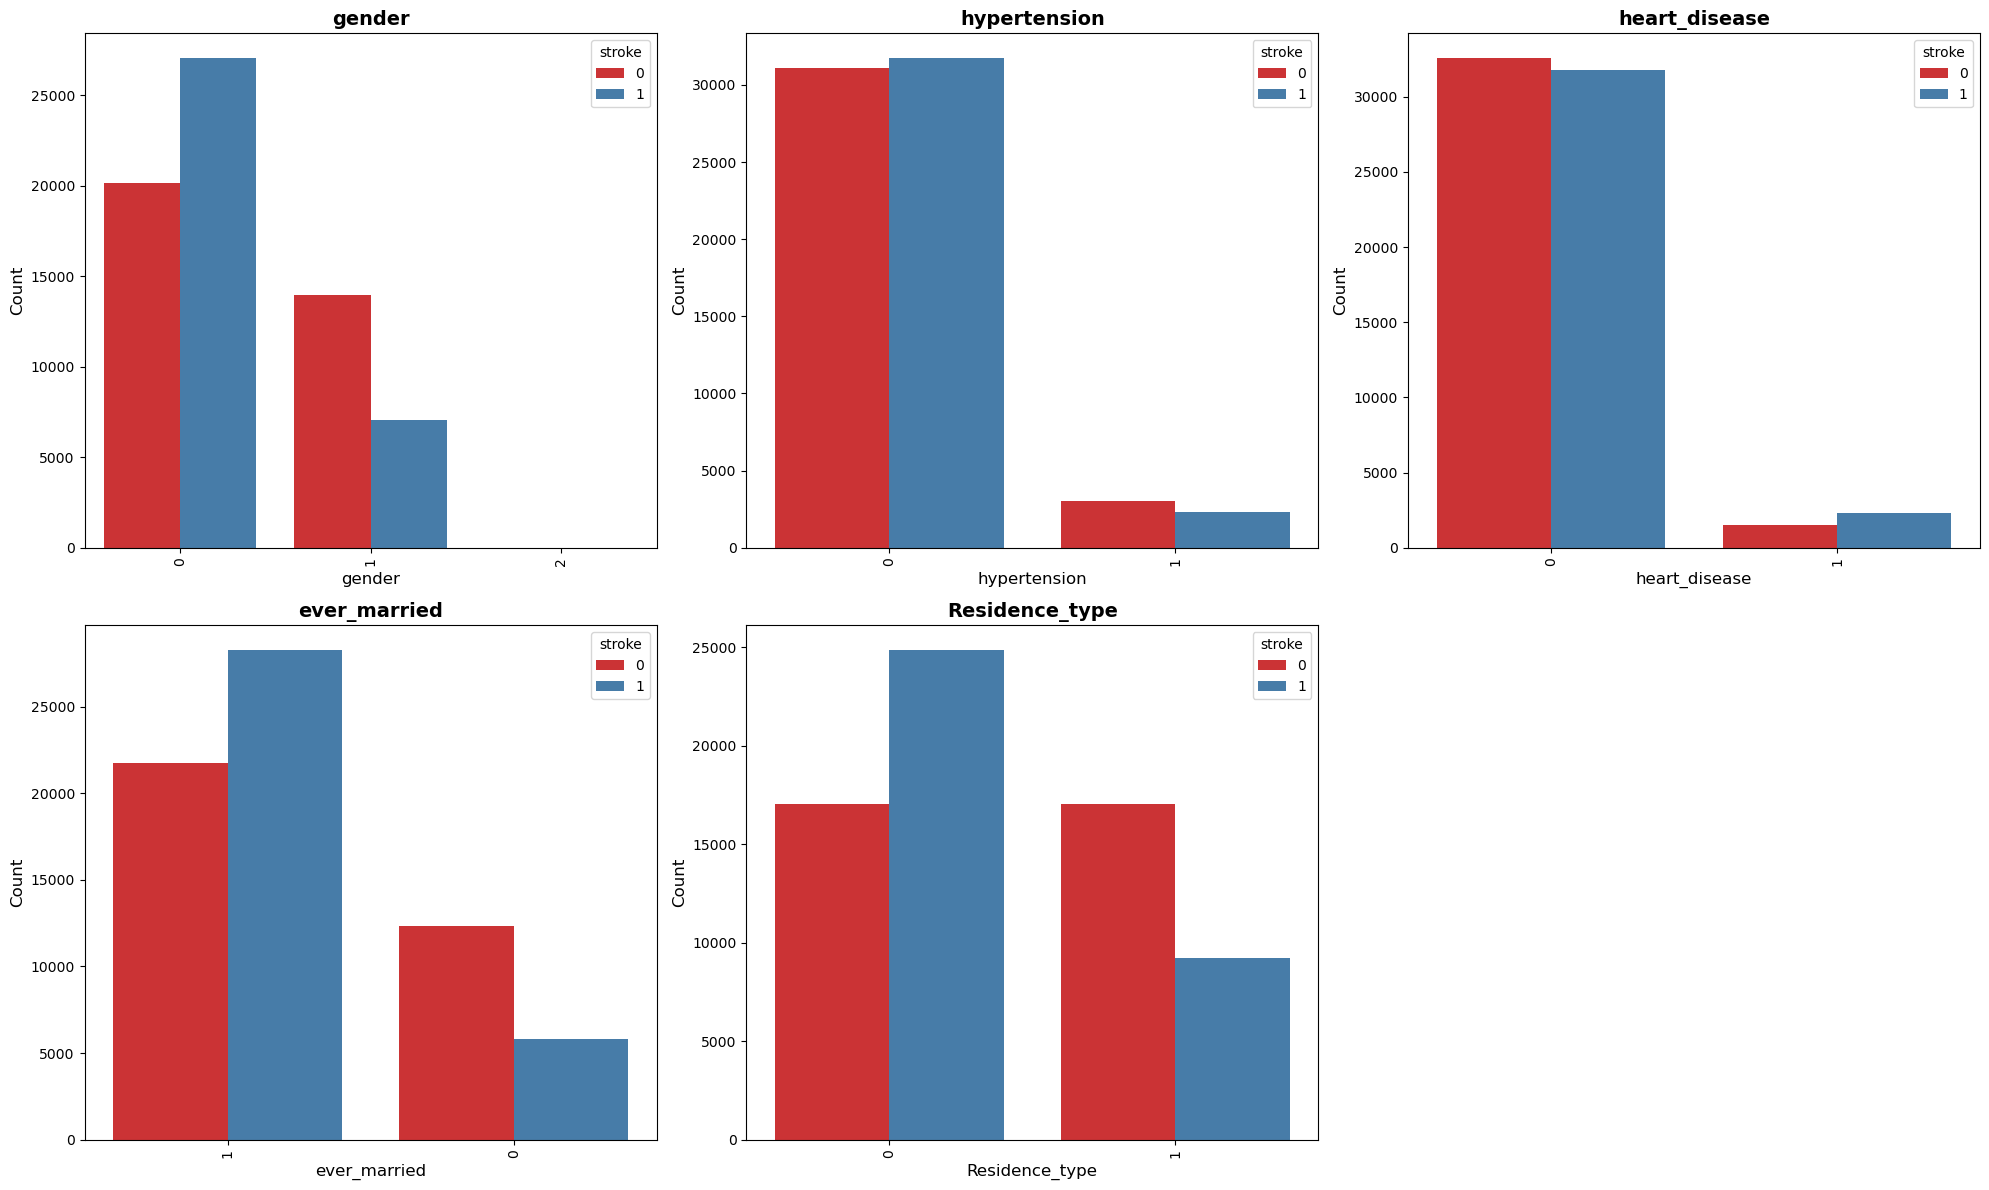

In [393]:
# Daftar kolom kategorikal yang ingin dibuat plot
columns_to_plot = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

# Definisi jumlah kolom dan baris
n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(20, n_rows * 6))

# Membuat countplot untuk setiap kolom kategorikal dalam X_train_smote
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Mengambil 10 nilai teratas dari kolom
    top_10_items = X_train_smote[column].value_counts().nlargest(10).index
    
    # Memfilter data hanya dengan nilai-nilai yang ada dalam top 10
    filtered_df = X_train_smote[X_train_smote[column].isin(top_10_items)]
    
    # Membuat countplot dengan hue pada target (y_train_smote)
    sns.countplot(data=filtered_df, x=column, palette='Set1', order=top_10_items, hue=y_train_smote)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Mengatur rotasi label x jika jumlah kategori terlalu banyak
    plt.xticks(rotation=90)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

plot di atas merupakan pengaruh dari kolom target yang sudah di `SMOTE` terhadap kolom - kolom lainnya

In [395]:
model_smote = RandomForestClassifier(random_state = 42)

model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [396]:
# Prediksi pada data uji
y_pred_smote = model_smote.predict(X_test)
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

# Evaluasi dengan metrik
accuracy = accuracy_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_prob_smote)

print("Evaluation Results After SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Evaluation Results After SMOTE:
Accuracy: 0.9518
F1 Score: 0.0752
ROC AUC Score: 0.7601


In [397]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8519
           1       0.06      0.11      0.08       161

    accuracy                           0.95      8680
   macro avg       0.52      0.54      0.53      8680
weighted avg       0.97      0.95      0.96      8680



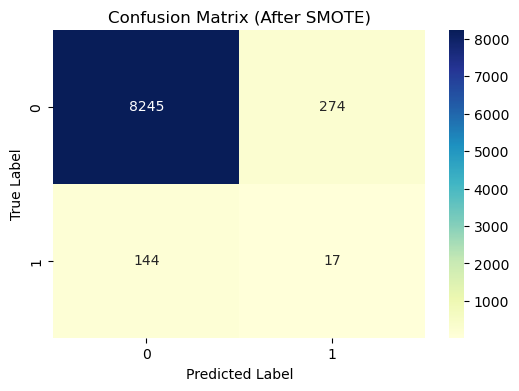

In [398]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

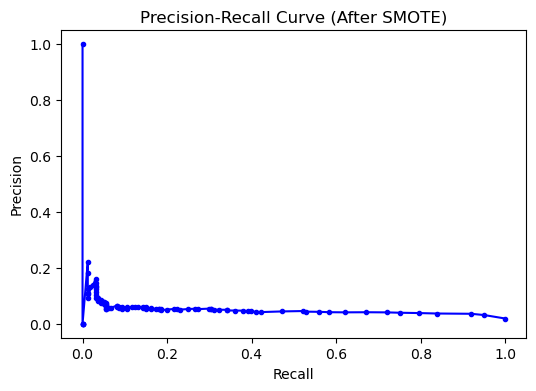

In [399]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_smote)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve (After SMOTE)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

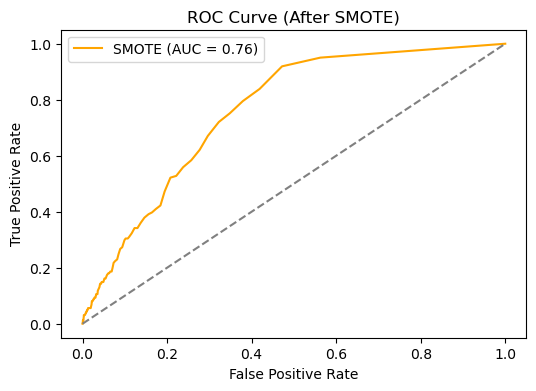

In [400]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_smote)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'SMOTE (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (After SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Random Under Sampling

Undersampling adalah teknik untuk menyeimbangkan kumpulan data yang tidak seimbang dengan mempertahankan semua data dalam kelas minoritas dan mengurangi ukuran kelas mayoritas. Ini adalah salah satu dari beberapa teknik yang dapat digunakan ilmuwan data untuk mengekstrak informasi yang lebih akurat dari kumpulan data yang awalnya tidak seimbang. Meskipun memiliki kekurangan, seperti hilangnya informasi yang berpotensi penting

In [403]:
from imblearn.under_sampling import RandomUnderSampler

# Inisialisasi RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Terapkan undersampling pada data pelatihan
X_train_resampled_under, y_train_resampled_under = undersample.fit_resample(X_train, y_train)

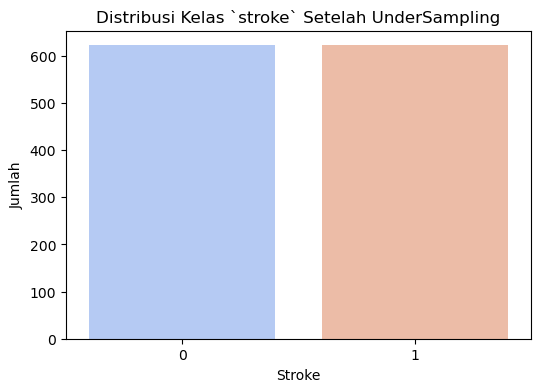

In [404]:
# Visualisasi Setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled_under, palette='coolwarm')
plt.title('Distribusi Kelas `stroke` Setelah UnderSampling')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.show()

In [405]:
len(y_train), len(y_train_resampled_under)

(34720, 1244)

## Langkah-langkah Random Undersampling

- **Identifikasi Kelas Mayoritas dan Minoritas:** Tentukan kelas dengan jumlah sampel terbanyak (mayoritas) dan jumlah paling sedikit (minoritas) dalam dataset.

- **Tentukan Rasio Sampling yang Diinginkan:** Tentukan jumlah sampel kelas mayoritas yang ingin disamakan dengan kelas minoritas atau sesuai dengan rasio tertentu.

- **Ambil Sampel Kelas Mayoritas Secara Acak:**  Pilih sejumlah sampel secara acak dari kelas mayoritas hingga mencapai jumlah yang sesuai. Metode ini tidak menggunakan jarak atau perhitungan khusus.

- **Gabungkan Dataset yang Sudah Diundersample:** Gabungkan sampel kelas mayoritas yang telah diambil secara acak dengan seluruh sampel kelas minoritas untuk membentuk dataset baru yang seimbang.

Tidak ada rumus perhitungan khusus dalam Random Undersampling karena sampel diambil secara acak.

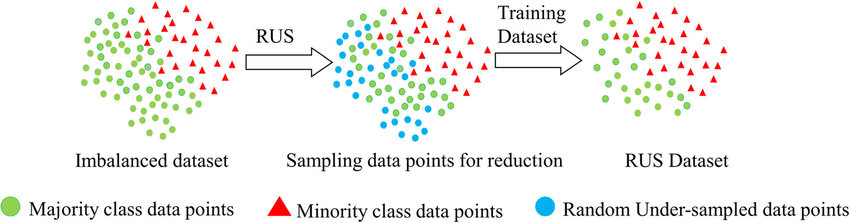

### Kelebihan:

- Mengurangi Ukuran Dataset: Mengurangi jumlah data dapat mempercepat proses pelatihan model dan menghemat memori.

- Sederhana dan Mudah Diterapkan: Metode ini juga mudah diimplementasikan dan tidak memerlukan teknik yang kompleks.

- Mengurangi Noise: Dapat mengurangi noise dalam dataset dengan menghilangkan data yang tidak penting dari kelas mayoritas.

### Kekurangan 

- Kehilangan Informasi: Menghilangkan sampel dari kelas mayoritas dapat menyebabkan hilangnya informasi penting, yang bisa mempengaruhi performa model.

- Underfitting: Risiko underfitting jika terlalu banyak data yang dibuang, sehingga model tidak dapat belajar dengan baik.

- Potensi Bias: Memilih sampel secara acak dapat memperkenalkan bias jika tidak hati-hati, terutama jika ada struktur dalam data yang perlu dipertahankan.

In [409]:
model_res = RandomForestClassifier(random_state=42)
model_res.fit(X_train_resampled_under, y_train_resampled_under)

RandomForestClassifier(random_state=42)

In [410]:
# Prediksi pada data uji
y_pred_res = model_res.predict(X_test)
y_prob_res = model_res.predict_proba(X_test)[:, 1]

# Evaluasi dengan metrik
accuracy = accuracy_score(y_test, y_pred_res)
f1 = f1_score(y_test, y_pred_res)
roc_auc = roc_auc_score(y_test, y_prob_res)

print("Evaluation Results After UnderSampling:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Evaluation Results After UnderSampling:
Accuracy: 0.7263
F1 Score: 0.0917
ROC AUC Score: 0.8106


In [411]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_res))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8519
           1       0.05      0.75      0.09       161

    accuracy                           0.73      8680
   macro avg       0.52      0.74      0.47      8680
weighted avg       0.98      0.73      0.82      8680



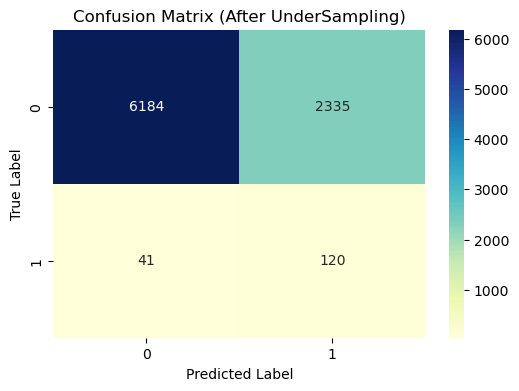

In [412]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_res), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix (After UnderSampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

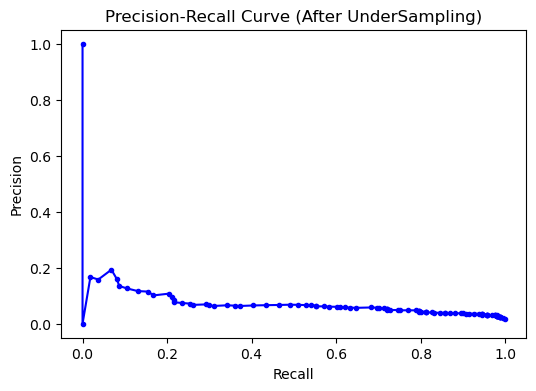

In [413]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_res)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve (After UnderSampling)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

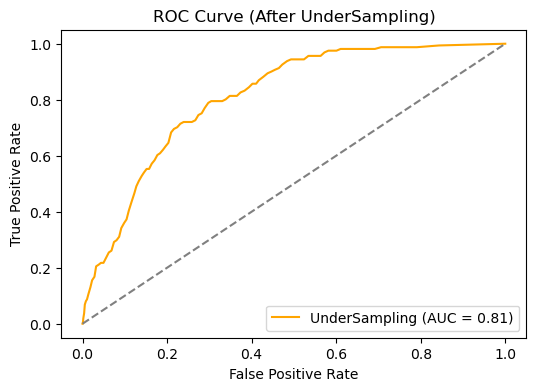

In [414]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_res)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'UnderSampling (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (After UnderSampling)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Random Over Sampling

Oversampling adalah teknik penambahan data yang digunakan saat menangani kumpulan data yang tidak seimbang di mana kelas mayoritas mendominasi kelas minoritas. Teknik ini menyeimbangkan distribusi kelas dengan meningkatkan jumlah sampel di kelas minoritas.

Oversampling meningkatkan jumlah titik data yang termasuk dalam kelas minoritas dengan menduplikasi titik data yang sudah ada atau menghasilkan titik data baru dengan membuat data sintetis.

In [417]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler(random_state=42)

# Terapkan undersampling pada data pelatihan
X_train_resampled_up, y_train_resampled_up = ran.fit_resample(X_train, y_train)

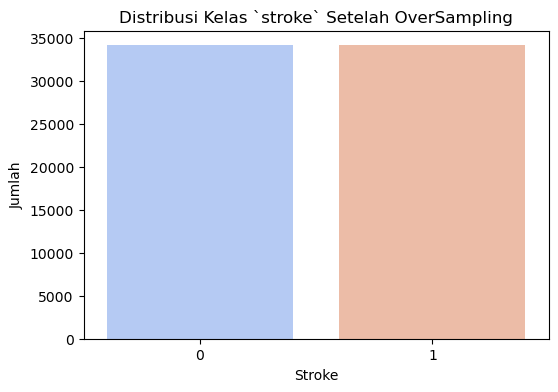

In [418]:
# Visualisasi Setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled_up, palette='coolwarm')
plt.title('Distribusi Kelas `stroke` Setelah OverSampling')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.show()

In [419]:
len(y_train), len(y_train_resampled_up)

(34720, 68196)

## Langkah-langkah Random Oversampling

- **Identifikasi Kelas Mayoritas dan Minoritas:** Tentukan kelas dengan jumlah sampel terbanyak (mayoritas) dan yang paling sedikit (minoritas) dalam dataset.

- **Tentukan Rasio Sampling yang Diinginkan:** Tentukan jumlah sampel kelas minoritas yang ingin ditambahkan, biasanya untuk menyamakan jumlahnya dengan kelas mayoritas atau berdasarkan rasio tertentu.

- **Duplikasi Sampel Secara Acak:** Pilih sejumlah sampel secara acak dari kelas minoritas dan duplikasikan hingga mencapai jumlah yang diinginkan. Pemilihan dilakukan dengan penggantian (replacement), yang artinya beberapa sampel mungkin terduplikasi beberapa kali.

- **Gabungkan Dataset yang Sudah Dioversample:** Gabungkan data minoritas yang sudah dioversample dengan seluruh sampel dari kelas mayoritas untuk mendapatkan dataset yang seimbang.

Tidak ada rumus perhitungan khusus dalam Random Oversampling karena teknik ini hanya menambahkan sampel secara acak dengan penggantian, tanpa melakukan interpolasi atau perhitungan jarak antar-sampel.

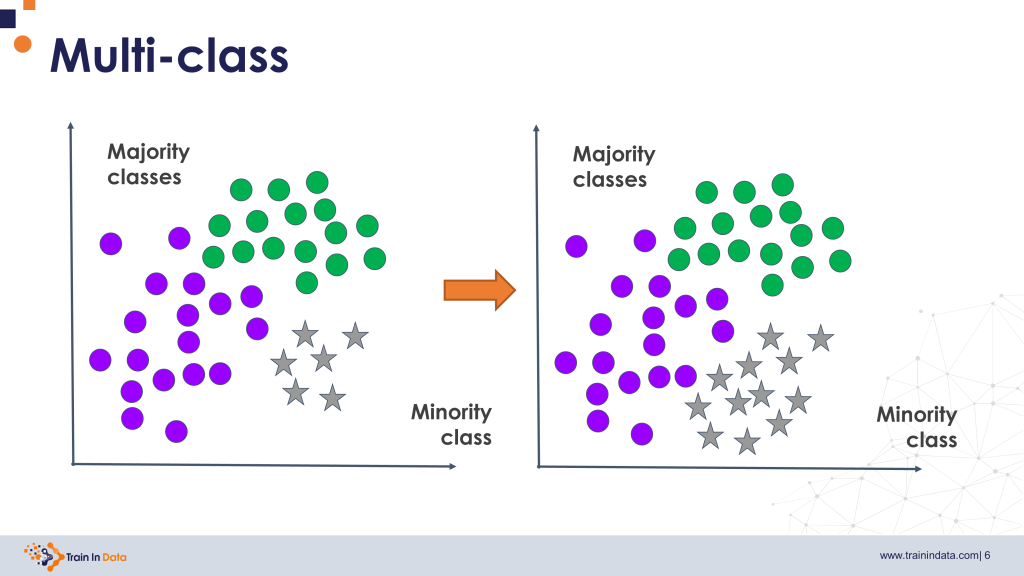

### Kelebihan:

- Menjaga Informasi: Tidak menghilangkan data dari kelas mayoritas, sehingga informasi tetap utuh.

- Meningkatkan Akurasi Model: Dapat meningkatkan performa model pada kelas minoritas dengan memberikan lebih banyak contoh untuk dipelajari.

- Sederhana dan Mudah Diterapkan: Metode ini mudah diimplementasikan dan tidak memerlukan teknik yang kompleks.

### Kekurangan:

- Overfitting: Dapat menyebabkan overfitting karena beberapa sampel minoritas mungkin terduplikasi, membuat model belajar pola yang tidak umum.

- Peningkatan Waktu Komputasi: Jumlah data yang lebih besar dapat memperlambat proses pelatihan model.

- Tidak Menyelesaikan Masalah Ketidakseimbangan Secara Total: Meskipun jumlah sampel minoritas meningkat, permasalahan ketidakseimbangan data mungkin tetap ada.

In [423]:
model_up = RandomForestClassifier(random_state=42)
model_up.fit(X_train_resampled_up, y_train_resampled_up)

RandomForestClassifier(random_state=42)

In [424]:
# Prediksi pada data uji
y_pred_up = model_up.predict(X_test)
y_prob_up = model_up.predict_proba(X_test)[:, 1]

# Evaluasi dengan metrik
accuracy = accuracy_score(y_test, y_pred_up)
f1 = f1_score(y_test, y_pred_up)
roc_auc = roc_auc_score(y_test, y_prob_up)

print("Evaluation Results After OverSampling:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Evaluation Results After OverSampling:
Accuracy: 0.9800
F1 Score: 0.0333
ROC AUC Score: 0.7754


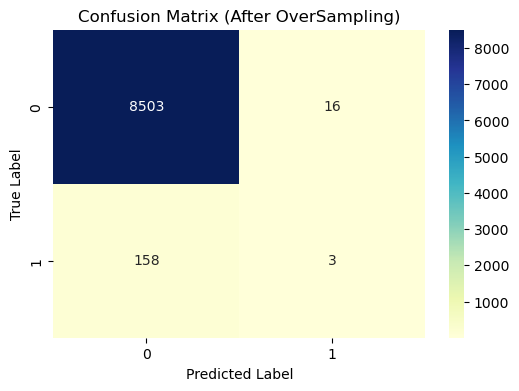

In [425]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_up), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix (After OverSampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

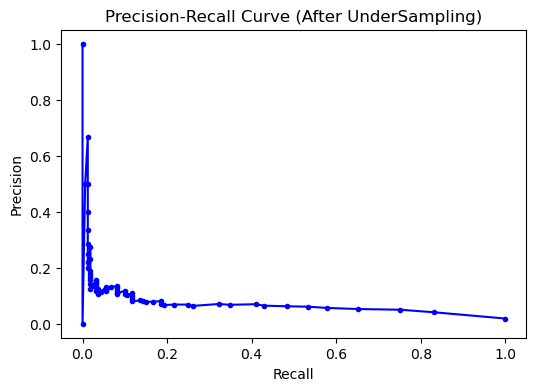

In [426]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_up)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve (After UnderSampling)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

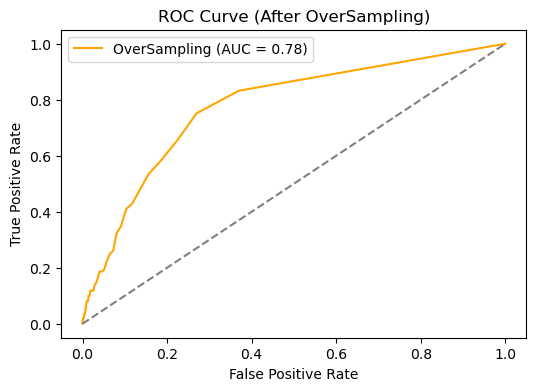

In [427]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_up)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'OverSampling (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (After OverSampling)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Perbedaan OverSampling dan SMOTE

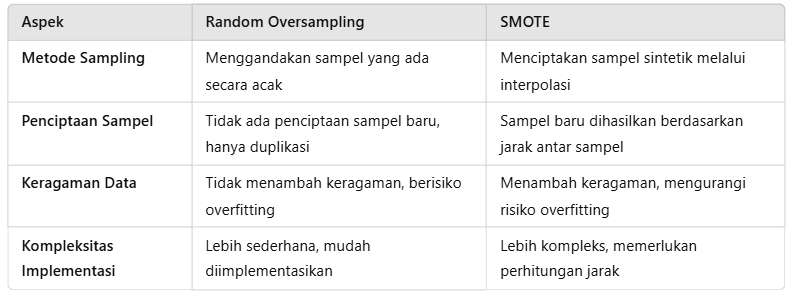

## Analisis Metrik Evaluasi

Dalam konteks klasifikasi untuk mengidentifikasi stroke, tujuan utama adalah **untuk mendeteksi sebanyak mungkin kasus stroke (kelas minoritas)** secara akurat, meskipun itu mungkin mengorbankan sedikit akurasi keseluruhan. Oleh karena itu, metrik seperti F1 Score dan ROC AUC sangat penting, karena mereka lebih baik dalam mengevaluasi performa pada kelas minoritas daripada akurasi, yang bisa sangat dipengaruhi oleh ketidakseimbangan kelas.

Berdasarkan tujuan untuk mendeteksi stroke, UnderSampling adalah pilihan terbaik di antara ketiga model, karena memiliki F1 Score dan ROC AUC tertinggi. Meskipun akurasinya lebih rendah, model ini lebih mampu dalam mengidentifikasi kelas minoritas (stroke), yang merupakan prioritas utama dalam kasus medis seperti ini.